In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix,precision_score,recall_score,classification_report

#### Data Analysis and Preprocessing

In [245]:
df1 = pd.read_csv('supermarket-sales-data.csv')
df1

,InvoiceID,Branch,CustomerType,Gender,ProductType,UnitPrice,Quantity,Tax,Total,PaymentType,Rating
0,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,UPI,9.1
1,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,9.6
2,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,7.4
3,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,UPI,8.4
4,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,UPI,5.3
...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,UPI,6.2
996,303-96-2227,B,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,UPI,4.4
997,727-02-1313,A,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,Cash,7.7
998,347-56-2442,A,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,Cash,4.1


In [246]:
df1.shape

(1000, 11)

In [247]:
df1.dtypes

InvoiceID        object
Branch           object
CustomerType     object
Gender           object
ProductType      object
UnitPrice       float64
Quantity          int64
Tax             float64
Total           float64
PaymentType      object
Rating          float64
dtype: object

In [248]:
df1.describe()

,UnitPrice,Quantity,Tax,Total,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,6.97270
std,26.494628,2.923431,11.708825,245.885335,1.71858
min,10.080000,1.000000,0.508500,10.678500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,5.50000
50%,55.230000,5.000000,12.088000,253.848000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,10.00000


In [249]:
df1.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

In [250]:
df1.isna().sum()

InvoiceID       0
Branch          0
CustomerType    0
Gender          0
ProductType     0
UnitPrice       0
Quantity        0
Tax             0
Total           0
PaymentType     0
Rating          0
dtype: int64

<Axes: >

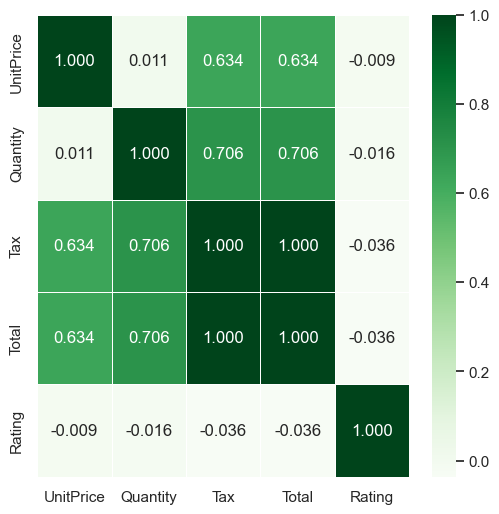

In [251]:
num_data = df1.iloc[:,1:].select_dtypes(include = ["int64","float64"])
sns.set_theme(rc={'figure.figsize':(6,6)})
sns.heatmap(num_data.corr(),annot=True,cmap="Greens",linewidths=0.4,fmt=".3f")

In [252]:
df1.columns

Index(['InvoiceID', 'Branch', 'CustomerType', 'Gender', 'ProductType',
       'UnitPrice', 'Quantity', 'Tax', 'Total', 'PaymentType', 'Rating'],
      dtype='object')

#### Encoding Data to numeric

In [253]:
df1[['Branch', 'CustomerType', 'Gender', 'ProductType', 'PaymentType']] = df1[['Branch', 'CustomerType', 'Gender', 'ProductType', 'PaymentType']].apply(LabelEncoder().fit_transform)
df1

,InvoiceID,Branch,CustomerType,Gender,ProductType,UnitPrice,Quantity,Tax,Total,PaymentType,Rating
0,750-67-8428,0,0,0,3,74.69,7,26.1415,548.9715,2,9.1
1,226-31-3081,2,1,0,0,15.28,5,3.8200,80.2200,0,9.6
2,631-41-3108,0,1,1,4,46.33,7,16.2155,340.5255,1,7.4
3,123-19-1176,0,0,1,3,58.22,8,23.2880,489.0480,2,8.4
4,373-73-7910,0,1,1,5,86.31,7,30.2085,634.3785,2,5.3
...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,2,1,1,3,40.35,1,2.0175,42.3675,2,6.2
996,303-96-2227,1,1,0,4,97.38,10,48.6900,1022.4900,2,4.4
997,727-02-1313,0,0,1,2,31.84,1,1.5920,33.4320,0,7.7
998,347-56-2442,0,1,1,4,65.82,1,3.2910,69.1110,0,4.1


In [254]:
df1.dtypes

InvoiceID        object
Branch            int32
CustomerType      int32
Gender            int32
ProductType       int32
UnitPrice       float64
Quantity          int64
Tax             float64
Total           float64
PaymentType       int32
Rating          float64
dtype: object

<Axes: >

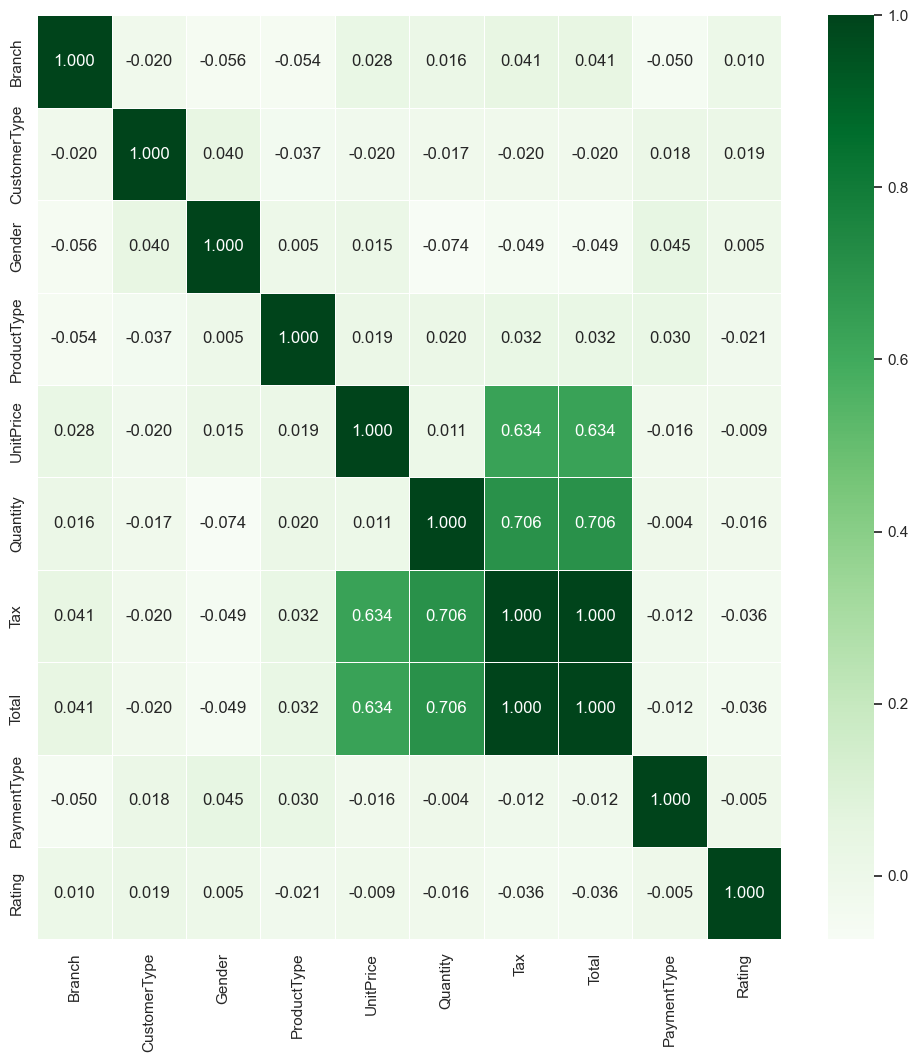

In [255]:
num_data = df1.iloc[:,1:].select_dtypes(include = ["int64","float64","int32"])
sns.set_theme(rc={'figure.figsize':(12,12)})
sns.heatmap(num_data.corr(),annot=True,cmap="Greens",linewidths=0.4,fmt=".3f")

#### 

In [256]:
scaled_df = StandardScaler().fit_transform(df1.iloc[:,1:].values)
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = df1.iloc[:,1:].columns
scaled_df

,Branch,CustomerType,Gender,ProductType,UnitPrice,Quantity,Tax,Total,PaymentType,Rating
0,-1.208970,-0.998002,-0.998002,0.319617,0.718160,0.509930,0.919607,0.919607,1.203528,1.238443
1,1.238338,1.002002,-0.998002,-1.430109,-1.525303,-0.174540,-0.987730,-0.987730,-1.205937,1.529527
2,-1.208970,1.002002,1.002002,0.902859,-0.352781,0.509930,0.071446,0.071446,-0.001205,0.248760
3,-1.208970,-0.998002,1.002002,0.319617,0.096214,0.852165,0.675780,0.675780,1.203528,0.830927
4,-1.208970,1.002002,1.002002,1.486101,1.156959,0.509930,1.267125,1.267125,1.203528,-0.973790
...,...,...,...,...,...,...,...,...,...,...
995,1.238338,1.002002,1.002002,0.319617,-0.578600,-1.543480,-1.141750,-1.141750,1.203528,-0.449840
996,0.014684,1.002002,-0.998002,0.902859,1.574989,1.536635,2.846340,2.846340,1.203528,-1.497741
997,-1.208970,-0.998002,1.002002,-0.263625,-0.899958,-1.543480,-1.178109,-1.178109,-1.205937,0.423410
998,-1.208970,1.002002,1.002002,0.902859,0.383208,-1.543480,-1.032932,-1.032932,-1.205937,-1.672391


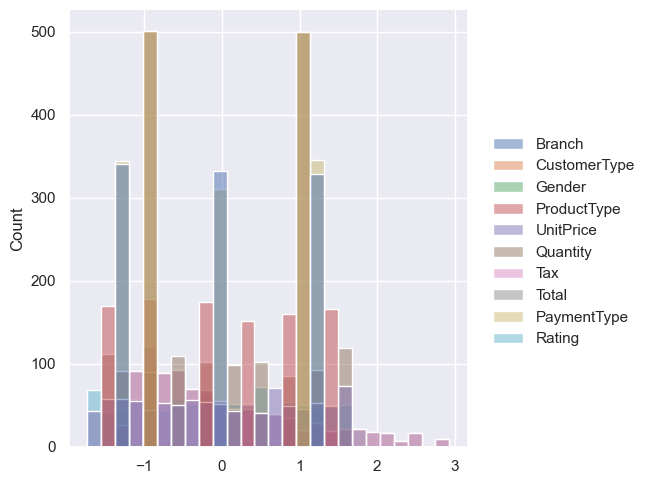

In [257]:
sns.set_theme(rc={'figure.figsize':(20, 12)})
sns.displot(scaled_df)

<Axes: >

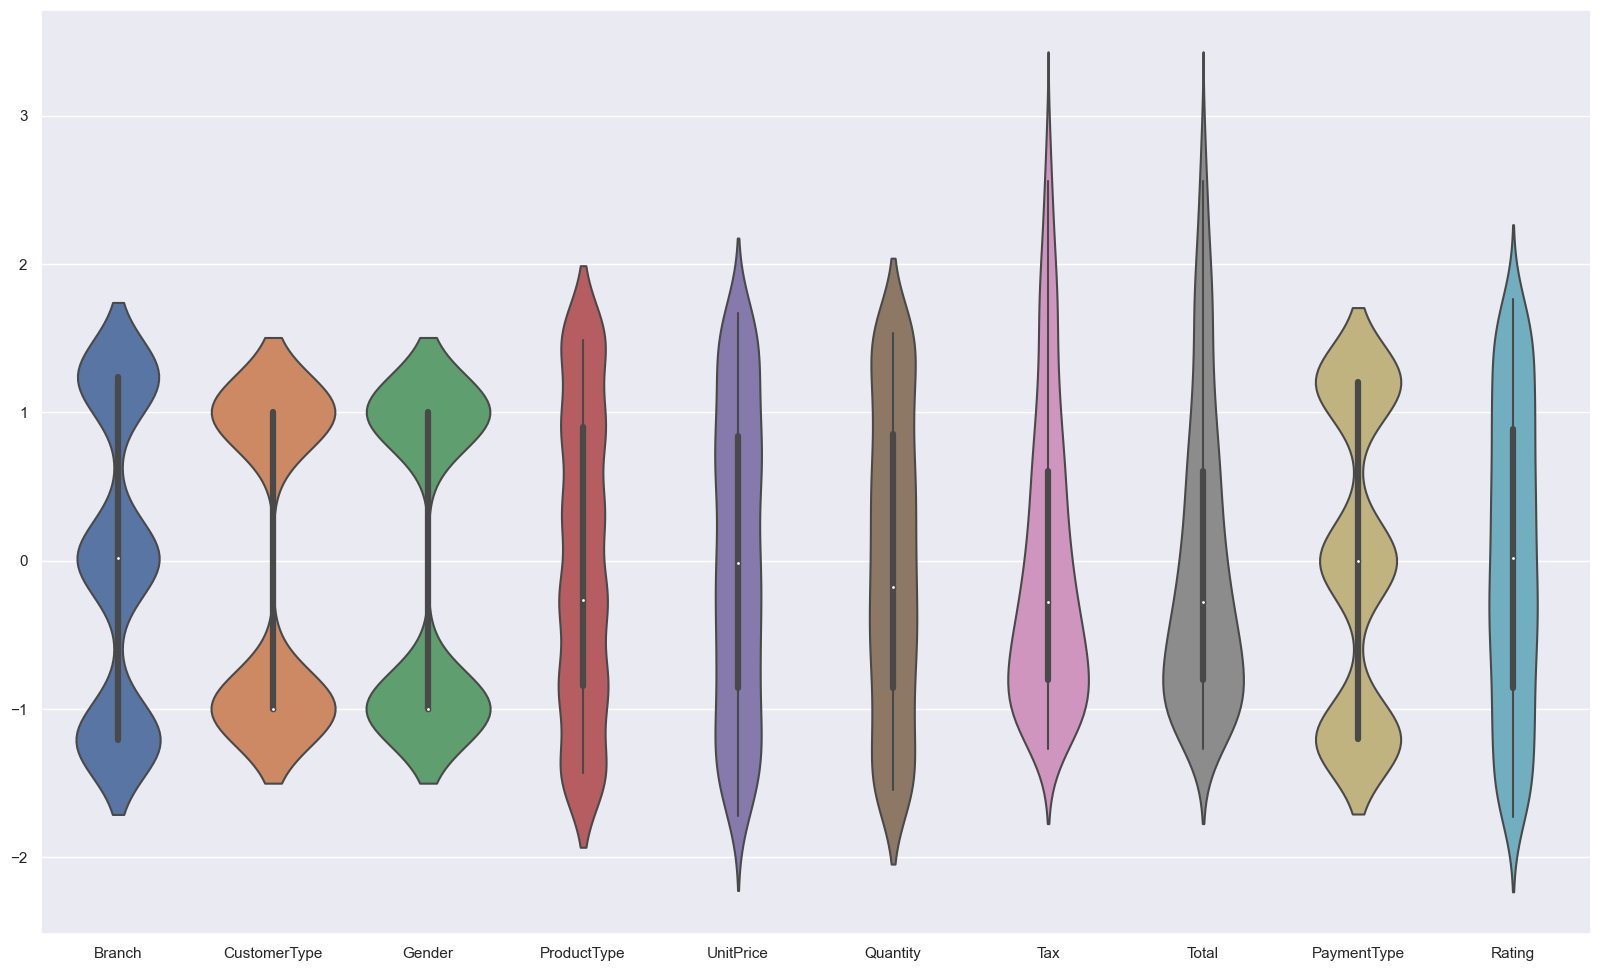

In [258]:
sns.set_theme(rc={'figure.figsize':(20,12)})
sns.violinplot(scaled_df)

<Axes: >

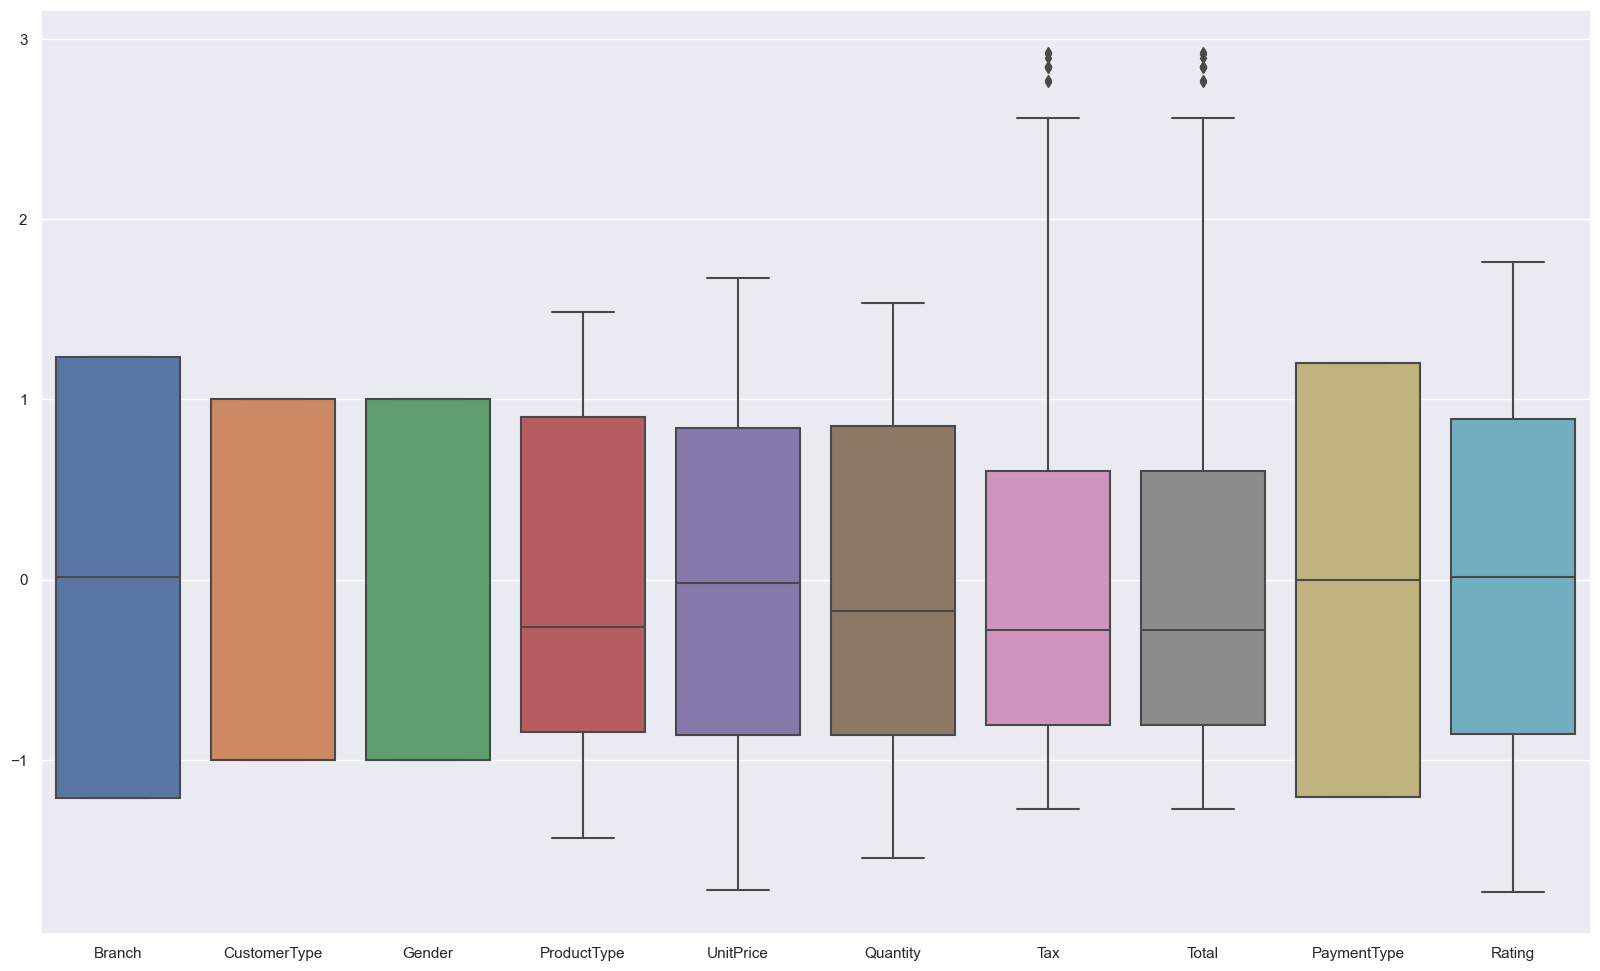

In [259]:
sns.boxplot(scaled_df)

#### Using DBScan

In [260]:
dbscan = DBSCAN(eps = 5,min_samples = 10)
model = dbscan.fit(scaled_df)
labels = model.labels_

# -1 value in anomaly_score column signifies that the data is anomalous
scaled_df["anomaly_score"] = labels
anomalies = scaled_df[scaled_df.anomaly_score == -1]
anomalies.shape

(0, 11)

Outlier detected in features Tax and Total from plots

In [261]:
# IQR method on Tax
Q1 = np.percentile(df1['Tax'], 25, method='midpoint')
Q3 = np.percentile(df1['Tax'], 75, method='midpoint')
IQR = (Q3 - Q1)
print(IQR)
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

df1 = df1[df1['Tax'] <= upper]
print(df1.shape)
df1 = df1[df1['Tax'] >= lower]
print(df1.shape)

df1

16.56575
(991, 11)
(991, 11)


,InvoiceID,Branch,CustomerType,Gender,ProductType,UnitPrice,Quantity,Tax,Total,PaymentType,Rating
0,750-67-8428,0,0,0,3,74.69,7,26.1415,548.9715,2,9.1
1,226-31-3081,2,1,0,0,15.28,5,3.8200,80.2200,0,9.6
2,631-41-3108,0,1,1,4,46.33,7,16.2155,340.5255,1,7.4
3,123-19-1176,0,0,1,3,58.22,8,23.2880,489.0480,2,8.4
4,373-73-7910,0,1,1,5,86.31,7,30.2085,634.3785,2,5.3
...,...,...,...,...,...,...,...,...,...,...,...
994,652-49-6720,2,0,0,0,60.95,1,3.0475,63.9975,2,5.9
995,233-67-5758,2,1,1,3,40.35,1,2.0175,42.3675,2,6.2
997,727-02-1313,0,0,1,2,31.84,1,1.5920,33.4320,0,7.7
998,347-56-2442,0,1,1,4,65.82,1,3.2910,69.1110,0,4.1


In [262]:
# IQR method on Total
Q1 = np.percentile(df1['Total'], 25, method='midpoint')
Q3 = np.percentile(df1['Total'], 75, method='midpoint')
IQR = (Q3 - Q1)
print(IQR)
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

df1 = df1[df1['Total'] <= upper]
print(df1.shape)
df1 = df1[df1['Total'] >= lower]
print(df1.shape)

df1

342.4995
(991, 11)
(991, 11)


,InvoiceID,Branch,CustomerType,Gender,ProductType,UnitPrice,Quantity,Tax,Total,PaymentType,Rating
0,750-67-8428,0,0,0,3,74.69,7,26.1415,548.9715,2,9.1
1,226-31-3081,2,1,0,0,15.28,5,3.8200,80.2200,0,9.6
2,631-41-3108,0,1,1,4,46.33,7,16.2155,340.5255,1,7.4
3,123-19-1176,0,0,1,3,58.22,8,23.2880,489.0480,2,8.4
4,373-73-7910,0,1,1,5,86.31,7,30.2085,634.3785,2,5.3
...,...,...,...,...,...,...,...,...,...,...,...
994,652-49-6720,2,0,0,0,60.95,1,3.0475,63.9975,2,5.9
995,233-67-5758,2,1,1,3,40.35,1,2.0175,42.3675,2,6.2
997,727-02-1313,0,0,1,2,31.84,1,1.5920,33.4320,0,7.7
998,347-56-2442,0,1,1,4,65.82,1,3.2910,69.1110,0,4.1


Outliers are now removed